### Discretizing the general diffusion equation

Let the spatial step size be $a$ and the temporal step size be $h$. The double derivative wrt x is then
$$\frac{\partial^2 T}{\partial x^2} = \frac{T(x+a,t) - 2T(x,t) + T(x-a,t)}{a^2} $$
and the temporal derivative is
$$\frac{\partial T}{\partial t} = \frac{T(x,t+h) - T(x,t)}{h} $$
The discretized diffusion equation is thus,
$$ T(x,t+h) = T(x,t) + \frac{hD}{a^2}[T(x+a,t) - 2T(x,t) + T(x-a,t)] $$
The von Neumann stability criterion requires that the Fourier coefficients corresponding to each wavevector does not grow exponentially. This gives us
$$ h\leq \frac{a^2}{2D} $$

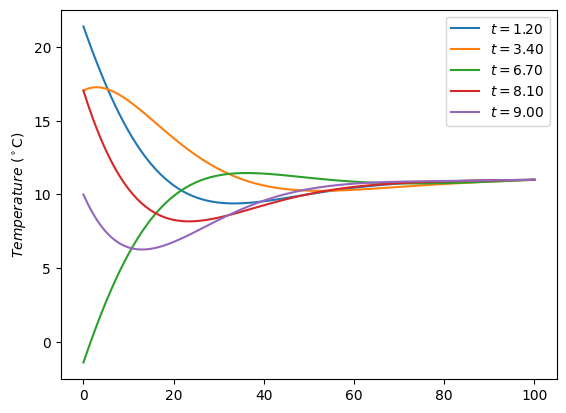

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 20            # Thickness of steel in meters
D = 0.1*365       # Thermal diffusivity, m^2/day
N = 100           # Number of divisions in grid
a = L/N           # Grid spacing
h = 1e-4          # Time-step
epsilon = h/1000

Tmid = 10.0   # Intermediate temperature in Celcius
T20 = 11      # degrees Celcius, uniform temperature at 20 m

A = 10        # degrees Celcius
B = 12        # degrees Celcius
tau = 1       # 365 days
def T0(t):
    return A + B*np.sin(2*np.pi*t/tau)

# times when we wish to plot the temperature profile
t1 = 1.2
t2 = 3.4
t3 = 6.7
t4 = 8.1
t5 = 9
tend = t5 + epsilon

# Create arrays
T = np.empty(N+1,float)     # starting array
T[0] = T0(0.0)
T[N] = T20
T[1:N] = Tmid
Tp = np.empty(N+1,float)    # evolved state array
Tp[N] = T20

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:
    # time dependent boundary conditions at the surface
    Tp[0] = T0(t)

    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])

    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t1))
    if abs(t-t2)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t2))
    if abs(t-t3)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t3))
    if abs(t-t4)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t4))
    if abs(t-t5)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t5))

# plt.xlabel(r"$Depth$ (m)")
plt.ylabel(r"$Temperature\ (^\circ$C)")
plt.legend()
plt.show()

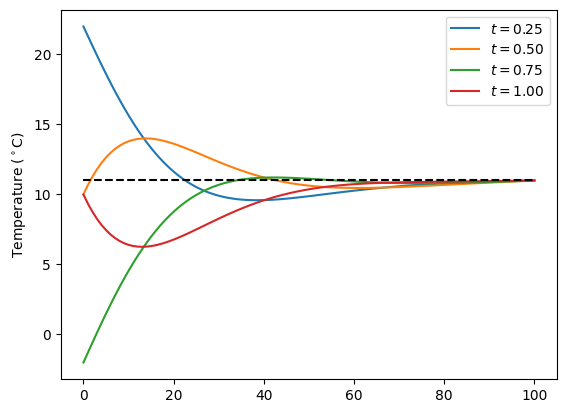

In [4]:
# times when we wish to plot the temperature profile
t1 = 0.0
t2 = 0.25
t3 = 0.5
t4 = 0.75
t5 = 1
tend = t5 + epsilon

# Main loop
t = t1
c = h*D/(a*a)
while t<tend:
    # time dependent boundary conditions at the surface
    Tp[0] = T0(t)

    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])

    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t1))
    if abs(t-t2)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t2))
    if abs(t-t3)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t3))
    if abs(t-t4)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t4))
    if abs(t-t5)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t5))

# plt.xlabel(r"$Depth$ (m)")
plt.ylabel(r"Temperature ($^\circ$C)")
plt.plot([0,100],[11,11],'k--')
plt.legend()
plt.show()